# **Módulo: Manipulación de Datos en Python**
**Reto: Análisis de deserción de empleados con sus sistemas operativos utilizados**


---




##Código


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd;

#3 Crear dataframes para cada archivo
dfTs1 = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Data6/Test.csv")
dfTs2 = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Data6/Test2.csv")
dfTr1 = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Data6/Train.csv")
dfTr2 = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Data6/Train2.csv")

#4 Conjunta de manera correcta la información,
#  de tal forma que queden todos los registros en un solo DataFrame que contenga todas las columnas necesarias
df_mergedTest = pd.merge(dfTs1,dfTs2, on=["Employee_ID"], how="outer")
#df_merged

df_mergedTrain = pd.merge(dfTr1,dfTr2, on=["Employee_ID"], how="outer")

#df_mergedfinal = pd.merge(df_mergedTest,df_mergedTrain, on=["Employee_ID"], how="outer")
df_concat = pd.concat([df_mergedTest, df_mergedTrain],ignore_index=True)

df_concat


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,VAR5,VAR6,VAR7,Computer_OS,Computer_OS_version,Computer_tickets,Mobile_OS,Mobile_OS_version,Mobile_tickets,Attrition_rate
0,EID_10000,M,37.0,3,Married,Springfield,Human Resource Management,Analytical,14.0,4,...,1,5,3,MacOS,Catalina,2,iOS,13.0,0,NaN
1,EID_10004,M,46.0,3,Married,Springfield,Purchasing,Analytical,22.0,1,...,3,6,3,Windows,10,1,Android,10.0,1,NaN
2,EID_10020,M,41.0,3,Married,Washington,Sales,Behavioral,10.0,2,...,3,7,4,Linux,ubuntu,2,iOS,12.0,0,NaN
3,EID_10026,F,41.0,3,Married,Franklin,Quality,Analytical,18.0,1,...,4,8,3,Windows,10,1,iOS,11.0,1,NaN
4,EID_10027,F,37.0,5,Single,Lebanon,Marketing,Analytical,11.0,3,...,2,9,4,Windows,8,0,Android,7.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_9981,F,41.0,4,Married,Clinton,Purchasing,Conceptual,18.0,1,...,2,8,4,Windows,10,4,Android,9.0,0,0.1008
9996,EID_9983,F,46.0,2,Single,Franklin,IT,Analytical,8.0,3,...,3,8,4,NaN,NaN,10,Android,7.0,3,0.0700
9997,EID_9985,F,37.0,3,Married,Springfield,Operarions,Directive,12.0,2,...,2,5,5,Windows,10,1,Android,8.0,1,0.5718
9998,EID_9989,M,46.0,4,Single,Springfield,Purchasing,Directive,17.0,1,...,2,8,3,Windows,10,1,Android,8.0,0,0.0372


In [ ]:

#df_concat.info()

# Seleccionar columnas
columnas_a_mantener = ['Employee_ID','Age','Education_Level',' Computer_OS',' Computer_tickets',' Mobile_OS',' Mobile_tickets']
df_final = df_concat[columnas_a_mantener]

#renombra columnas (elimina los espacios)
df_final = df_final.rename(columns={' Computer_OS': 'Computer_OS',
                                    ' Computer_tickets': 'Computer_tickets',
                                    ' Mobile_OS': 'Mobile_OS',
                                    ' Mobile_tickets' : 'Mobile_tickets'})


#df_final.info()
df_final


,Employee_ID,Age,Education_Level,Computer_OS,Computer_tickets,Mobile_OS,Mobile_tickets
0,EID_10000,37.0,3,MacOS,2,iOS,0
1,EID_10004,46.0,3,Windows,1,Android,1
2,EID_10020,41.0,3,Linux,2,iOS,0
3,EID_10026,41.0,3,Windows,1,iOS,1
4,EID_10027,37.0,5,Windows,0,Android,0
...,...,...,...,...,...,...,...
9995,EID_9981,41.0,4,Windows,4,Android,0
9996,EID_9983,46.0,2,NaN,10,Android,3
9997,EID_9985,37.0,3,Windows,1,Android,1
9998,EID_9989,46.0,4,Windows,1,Android,0


## Código 2

In [ ]:


#5 Para todos los registros que no tienen un valor para un sistema operativo,
#ya sea de su computadora o de su dispositivo móvil,
#asígnales el valor “no registrado“

#df_final['Computer_OS'] = df_final['Computer_OS'].fillna('No registrado')
#df_final['Mobile_OS'] = df_final['Mobile_OS'].fillna('No registrado')



#6 Ejecuta la instrucción adecuada en Pandas para encontrar lo siguiente:
#6.1 El porcentaje de personas que usan Windows, Mac, Linux o "No registrado"
#    como su sistema operativo en su computadora.
#    Se esperan 4 renglones en esta respuesta.

#df_final.groupby('Computer_OS').size()


#6.2 El porcentaje de personas que usan iOS, Android o "No registrado"
#    como su sistema operativo en su dispositivo móvil. Se esperan 3 renglones en esta respuesta.

#totalReg = df_final['Mobile_OS'].count()
#print(totalReg)
#df_final.groupby('Mobile_OS').agg(Porcentaje_Uso=('Mobile_OS', 'count'  ) ) / totalReg * 100

#6.3 La edad promedio de la gente que utiliza cada sistema operativo de escritorio.
df_final.groupby('Computer_OS').agg(Promedio_Edad=('Age', 'mean'))

#6.4 El nivel educativo promedio de la gente que utiliza cada sistema operativo de escritorio.
#df_final.groupby('Computer_OS').agg(Nivel_educativo_Promedio=('Education_Level', 'mean'))


#6.5 El número total de tickets generados por la gente, con cada sistema operativo de escritorio.
#df_final.groupby('Computer_OS').agg(Tickets_Generados=('Computer_tickets', 'sum'))


,Promedio_Edad
Computer_OS,
Linux,40.451902
MacOS,40.396251
No registrado,40.523490
Windows,39.457441


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<Axes: xlabel='total_bill', ylabel='Count'>

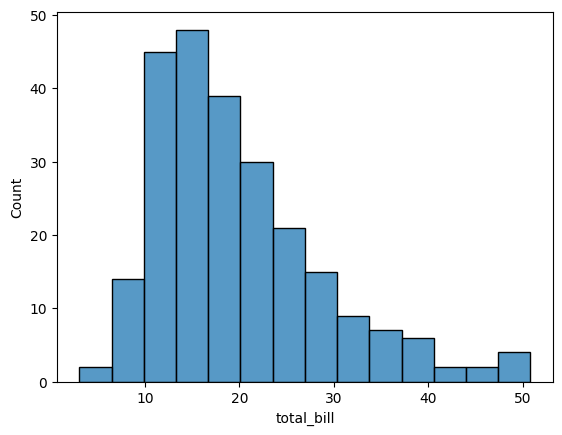

In [ ]:
import seaborn as sns

# Load the Tips dataset
tips = sns.load_dataset("tips")
print(tips.head())
# Create a histogram of the total bill amounts
sns.histplot(data=tips, x="total_bill")

<Axes: xlabel='total_bill', ylabel='tip'>

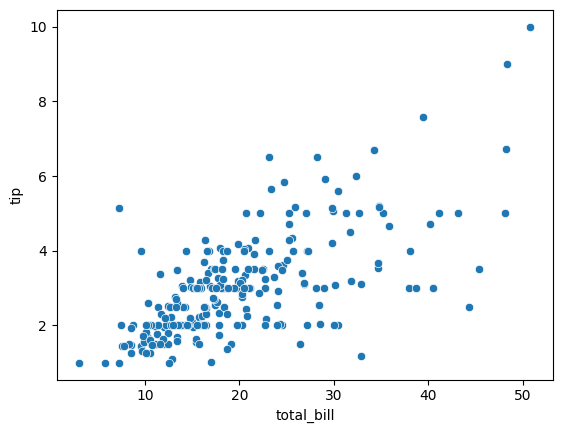

In [ ]:
#import seaborn as sns
#from Seaborn import load_dataset
#from seaborn import lmplot
#print(tips.head())
#sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False)
sns.scatterplot(x="total_bill", y="tip", data=tips)

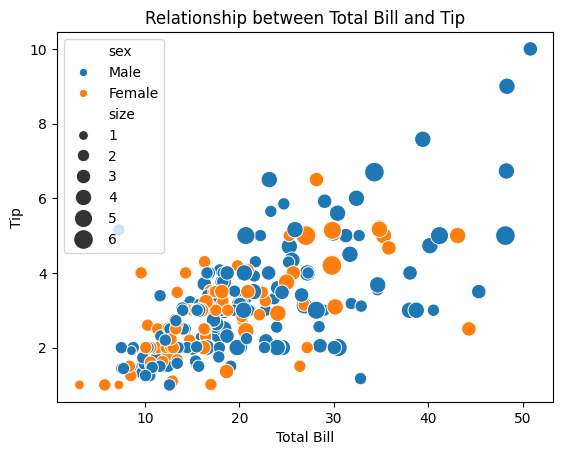

In [ ]:
# customize the scatter plot
sns.scatterplot(x="total_bill", y="tip", hue="sex", size="size", sizes=(50, 200), data=tips)

# add labels and title
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Relationship between Total Bill and Tip")

# display the plot
plt.show()

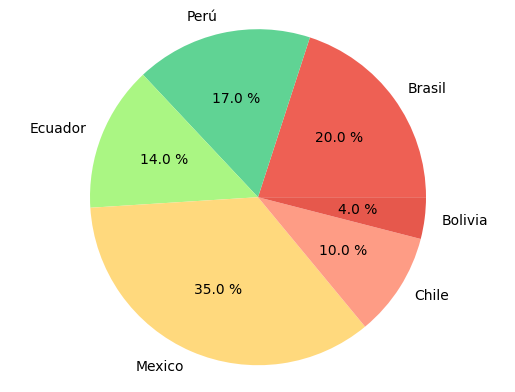

In [ ]:
import matplotlib.pyplot as plt
numero = [20,17,14,35,10,4]
nombres = ["Brasil","Perú","Ecuador","Mexico", "Chile", "Bolivia"]
colores = ["#EE6054","#60D394","#AAF683","#FFD97D","#FE9C85", "#E6584C"]
plt.pie(numero, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

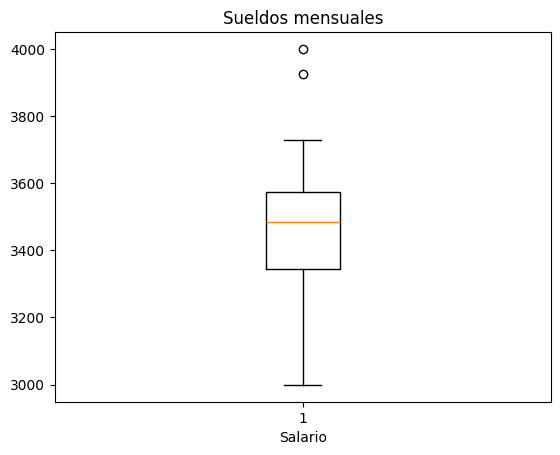

In [10]:
#importamos el módulo
import matplotlib.pyplot as plt
import seaborn as sns

# Aplica el estilo Seaborn
#plt.style.use(['seaborn'])
#plt.style.use(['seaborn-darkgrid'])

x= [3450,3550,3650,3480,3355,3310,3490,3730,3540,3925,3520,3480,3200,3100,4000,2999] #Datos de la variable
plt.boxplot(x) #Generamos el gráfico
plt.title('Sueldos mensuales') #Título del gráfico
plt.xlabel('Salario') #Etiqueta del eje x
plt.show() #Muestra la gráfica